### 2018 2019 2020 데이터셋은 ETRI 홈페이지에 있는 데이터를 사용하였으며, 주피터 노트북에 파일을 업로드하여 작업하였음)

### https://nanum.etri.re.kr/?lang=ko_KR

### 2018 2019 2020 데이터셋에서 e4Eda, e4Bvp, e4Hr ,e4Temp 각 수치에 대해 수면 전 1시간 기록을 각각 평균내어 user_sleep_2019_2018.csv & user_sleep_2020.csv 에 컬럼을 추가하고 평균값을 기입함

### 외부 모듈을 불러옴

In [1]:
import os
import glob
import pandas as pd
from datetime import datetime

### 폴더 구조는 원본 데이터의 폴더 구조에서 바뀌지 않음. 사진 참조.

### 2018년도 라이프로그 데이터셋 폴더구조 : '~/dataset_2018/dataset_2018/1',..,'~/dataset_2018/dataset_2018/30' 

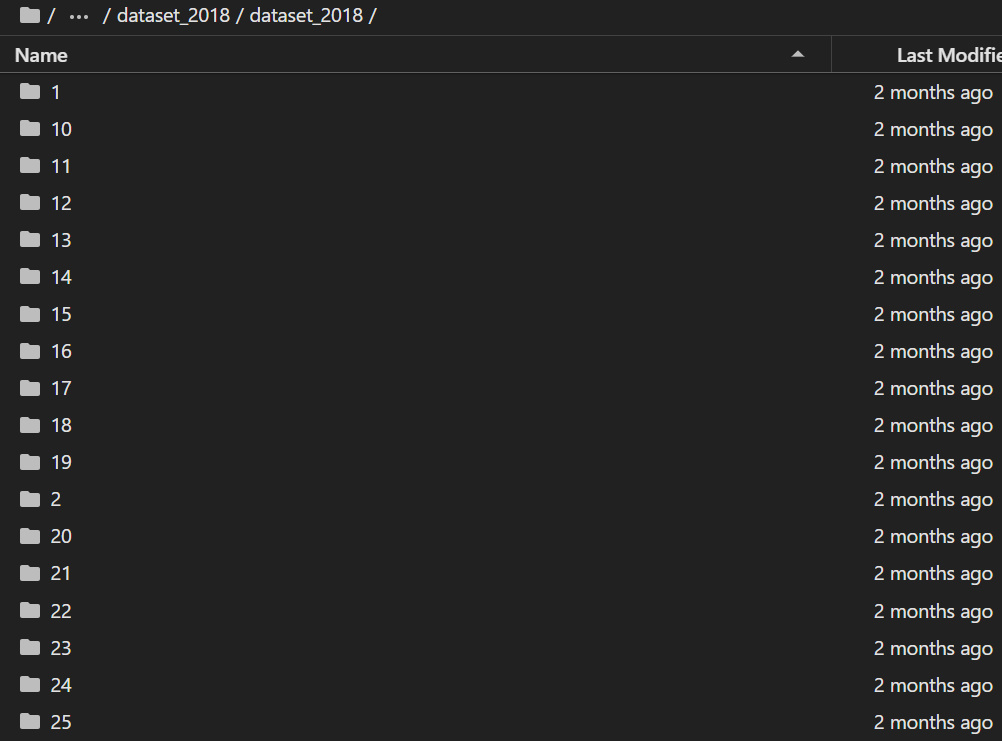

In [7]:
# 해당 코드는 돌아가지 않습니다.
from IPython.display import Image 
Image("1.jpg")

### 2019년도 라이프로그 데이터셋 폴더구조 : '~/dataset_2019/dataset_2019/101',..,'~/dataset_2019/dataset_2019/120' 

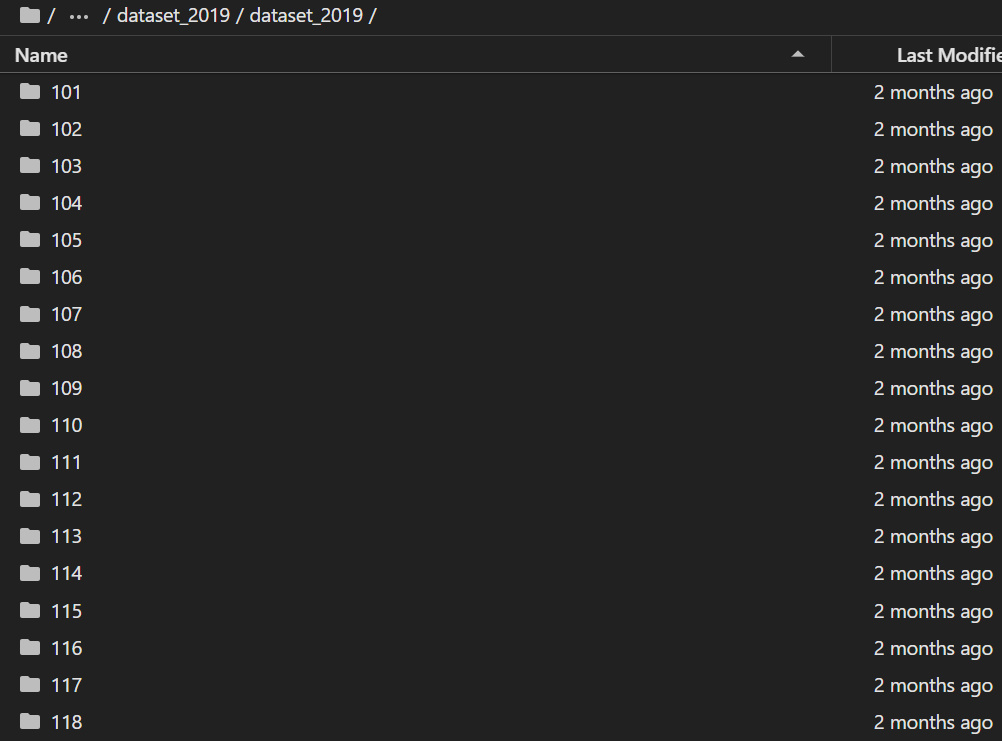

In [8]:
# 해당 코드는 돌아가지 않습니다.
Image("2.jpg")

### 2020년도 라이프로그 데이터셋 폴더구조 : '~/user01-06/user01-06/user01',..,'~/user26-30/user26-30/user30'

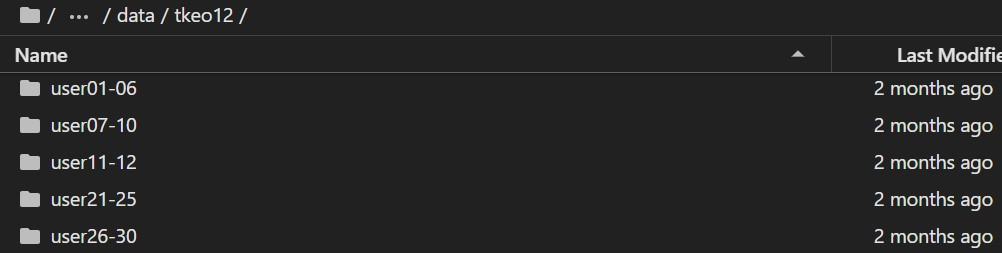

In [10]:
Image("3.jpg")

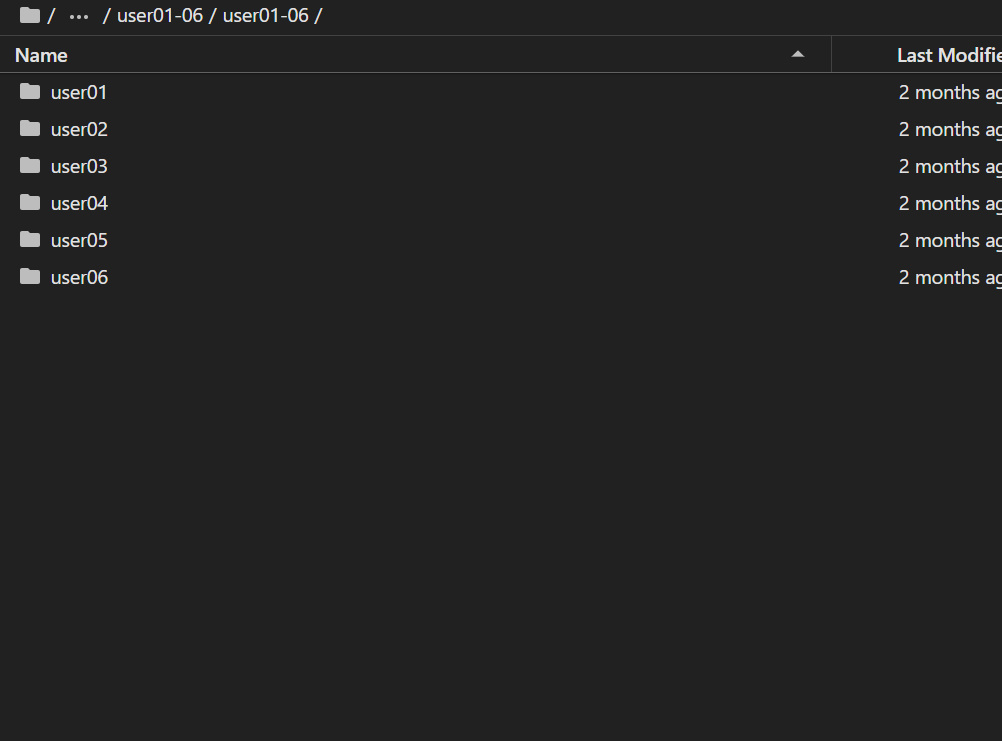

In [11]:
Image("4.jpg")

### 2018년 dataset에서 1~30 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임 생성

In [ ]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []

# 1부터 30까지의 숫자에 대해 반복 수행
for folder in range(1, 31):
    #각 반복에서 디렉토리 경로 생성, f스트링 안의 경로는 개인별 데이터 저장 경로로 변경 필요
    folder_path = f"/mnt/data/tkeo12/dataset_2018/dataset_2018/{folder}"
    # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
        
    # 해당 폴더의 하위디렉토리 목록을 가져옴    
    folder_list = os.listdir(folder_path)
    
    #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
         #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
        # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
        #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성    
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
            
        except:
            continue
        
        # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        
        #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
            #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    
                    dfs = []
                    
                    for file in file_path:
                        # 파일이 존재하면, 파일을 읽어들임.
                        if os.path.exists(file):
                            
                            df = pd.read_csv(file, na_values=["na", "null"])
                            # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다. 로컬에서 접근할 경우 r'file' 로 수정하여 읽어야함.
                            if df.isnull().values.any():
                                
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            # DataFrame을 리스트에 추가합니다.   
                            dfs.append(df)
                    # 리스트가 비어 있으면 건너뜁니다.        
                    if len(dfs) == 0:
                        continue
                    # 모든 DataFrame을 병합하고, 각 파일의 평균값을 계산합니다.    
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)

In [309]:
# 결과를 DataFrame으로 변환합니다.           
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(1, 31):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    
    if not folder_df.empty:
        print(f"userId : {folder}\n{folder_df}\n")

userId : 1
파일                          e4Bvp       e4Eda       e4Hr     e4Temp
날짜                                                                 
2018-11-15 (1542244200)  0.011557    2.131395  81.398129  34.627601
2018-11-16 (1542295920) -0.005642    0.121614  80.006229  32.864825
2018-11-17 (1542392820)  0.006961    0.330542  72.347900  33.956935
2018-11-18 (1542471480) -0.015563    0.290492  84.019970  33.884083
2018-11-19 (1542558180) -0.001972    0.729625  80.477496  34.444794
2018-11-20 (1542645360)  0.005119    0.257681  80.851895  34.334449
2018-11-21 (1542728340) -0.047083    0.427690  70.145050  31.861405
2018-11-23 (1542902340) -0.000471  223.632273  72.734008  34.540959
2018-11-24 (1543012320) -0.018901    0.587951  81.518586  30.846833
2018-11-25 (1543092300)  0.005919    2.528095  82.195905  33.551188
2018-11-26 (1543163760)  0.004394    0.362422  69.646405  33.129465
2018-11-27 (1543275900) -0.002164    0.789655  82.252499  34.372160
2018-11-28 (1543333680) -0.008612    

### 결과값의 pivot table 을 생성합니다

In [310]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot

파일,userId,날짜,e4Bvp,e4Eda,e4Hr,e4Temp
0,1,2018-11-15 (1542244200),0.011557,2.131395,81.398129,34.627601
1,1,2018-11-16 (1542295920),-0.005642,0.121614,80.006229,32.864825
2,1,2018-11-17 (1542392820),0.006961,0.330542,72.347900,33.956935
3,1,2018-11-18 (1542471480),-0.015563,0.290492,84.019970,33.884083
4,1,2018-11-19 (1542558180),-0.001972,0.729625,80.477496,34.444794
...,...,...,...,...,...,...
376,30,2018-11-24 (1543029060),0.000417,0.693704,84.231193,35.719695
377,30,2018-11-25 (1543104000),-0.007869,0.430001,82.935526,35.455277
378,30,2018-11-26 (1543193460),0.002362,0.157313,90.332692,34.672714
379,30,2018-11-27 (1543275480),0.003062,1.362961,91.764735,35.568111


### 날짜부분에 timestamp 형식을 빼 YYYY-MM-DD 형식으로 변환합니다.

In [311]:
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot

파일,userId,날짜,e4Bvp,e4Eda,e4Hr,e4Temp
0,1,2018-11-15,0.011557,2.131395,81.398129,34.627601
1,1,2018-11-16,-0.005642,0.121614,80.006229,32.864825
2,1,2018-11-17,0.006961,0.330542,72.347900,33.956935
3,1,2018-11-18,-0.015563,0.290492,84.019970,33.884083
4,1,2018-11-19,-0.001972,0.729625,80.477496,34.444794
...,...,...,...,...,...,...
376,30,2018-11-24,0.000417,0.693704,84.231193,35.719695
377,30,2018-11-25,-0.007869,0.430001,82.935526,35.455277
378,30,2018-11-26,0.002362,0.157313,90.332692,34.672714
379,30,2018-11-27,0.003062,1.362961,91.764735,35.568111


### sleep_df 를 만들어서 user_sleep_2019_2018.csv 에 e4Bvp , e4Eda , e4Hr , e4Temp 을 추가시키고  sleep_df 와 result_df 의 userId와 날짜를 매칭시키고 해당하는 네 가지 변수의 평균값을 기입합니다.

In [314]:
#sleep_df 생성합니다.
sleep_df = pd.read_csv("/mnt/data/tkeo12/user_sleep_2019_2018.csv")
# sleep_df에 새로운 열을 추가합니다. 이 열들은 각 사용자의 특정 날짜에 해당하는 e4Bvp, e4Eda, e4Hr, e4Temp 값들을 저장할 것입니다.
sleep_df["e4Bvp"] = ""
sleep_df["e4Eda"] = ""
sleep_df["e4Hr"] = ""
sleep_df["e4Temp"] = ""

# endDt 열에서 YYYY-MM-DD 부분만 추출합니다.
sleep_df["endDt"] = sleep_df["endDt"].str.split(" ").str[0]
# sleep_df를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2019_2018_sorted.csv", index=False)

# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
    # 일치하는 행이 있다면,
    if len(matches) > 0:
        # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
        
        # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })

# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)

# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2019_2018_sorted_e4.csv", index=False)

     userId       endDt     e4Bvp     e4Eda       e4Hr     e4Temp
0        17  2018-10-31  0.052945  3.324979  75.306386  30.473619
1        17  2018-11-01  0.000281  3.554109  98.951826  30.545920
2        17  2018-11-12 -0.000489  1.870591  86.854111  32.783177
3        24  2018-11-27 -0.002885  0.439017  92.547557  32.682936
4        24  2018-11-28  0.001066  0.377804  84.252654  32.247067
..      ...         ...       ...       ...        ...        ...
306      26  2018-11-23  0.007622  0.459085  92.390324  35.308907
307      26  2018-11-24 -0.004571  0.406092  87.909689  33.142663
308      26  2018-11-25  0.005812  0.156437  83.263710  34.601826
309      26  2018-11-26 -0.020771  0.396911  78.186163  32.991724
310      26  2018-11-27 -0.011405  0.254560  75.097974  33.332527

[311 rows x 6 columns]


### 2019년 dataset에서 101~120 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임 생성

In [318]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# 101부터 120까지의 숫자에 대해 반복 수행
for folder in range(101, 121):
     #각 반복에서 디렉토리 경로 생성
    folder_path = f"/mnt/data/tkeo12/dataset_2019/dataset_2019/{folder}"
    # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
    # 해당 폴더의 하위디렉토리 목록을 가져옴
    folder_list = os.listdir(folder_path)
    #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
         #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
         # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
         #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
        # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
            #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                        # 파일이 존재하면, 파일을 읽어들임
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                            # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다.
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            # DataFrame을 리스트에 추가합니다.
                            dfs.append(df)
                    # 리스트가 비어 있으면 건너뜁니다. 
                    if len(dfs) == 0:
                        continue
                     # 모든 DataFrame을 병합하고, 각 파일의 평균값을 계산합니다.
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.            
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(101, 121):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : {folder}\n{folder_df}\n")


userId : 101
파일                          e4Bvp     e4Eda       e4Hr     e4Temp
날짜                                                               
2020-01-02 (1577921400) -0.011081  0.086219  93.418809  31.542836
2020-01-03 (1578006360) -0.001020  0.154539  79.652816  35.199099
2020-01-04 (1578106380)  0.006969  0.159092  74.069986  33.433400
2020-01-05 (1578184020) -0.071773  0.053959  85.191698  30.732630
2020-01-08 (1578438900) -0.019285  0.155034  91.986470  32.490327
2020-01-09 (1578524640)  0.009619  0.080575  92.579176  33.388397
2020-01-10 (1578611340) -0.016908  0.424669  77.967949  36.293600
2020-01-11 (1578709560) -0.001576  0.254117  78.362843  33.922251
2020-01-12 (1578796020)  0.000987  0.242471  78.889575  32.057968
2020-01-13 (1578871020)  0.021416  0.095450  81.536141  34.629036

userId : 102
파일                          e4Bvp     e4Eda       e4Hr     e4Temp
날짜                                                               
2019-12-09 (1575857700)  0.004568  0.220427  76.3

### 결과값의 pivot table 을 생성합니다

In [328]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot

파일,userId,날짜,e4Bvp,e4Eda,e4Hr,e4Temp
0,1,2020-08-31 (1598832660),0.006758,38.142546,86.167639,34.434111
1,1,2020-09-05 (1599269580),-0.002495,10.322228,92.017808,34.252619
2,1,2020-09-07 (1599442080),-0.026307,1.191730,82.268164,34.561181
3,1,2020-09-08 (1599531660),-0.013653,3.103176,86.727616,33.021747
4,1,2020-09-09 (1599581100),0.056283,2.503302,87.789920,34.441982
...,...,...,...,...,...,...
136,6,2020-10-04 (1601737200),-0.002778,0.800862,71.381469,33.829131
137,6,2020-10-05 (1601823600),-0.000685,0.443531,72.356891,31.458604
138,6,2020-10-06 (1601912160),-0.003118,0.359264,68.923234,33.271286
139,6,2020-10-07 (1601996400),-0.017554,0.290453,74.605186,33.684044


### 날짜부분에 timestamp 형식을 빼 YYYY-MM-DD 형식으로 변환합니다.

In [321]:
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot

파일,userId,날짜,e4Bvp,e4Eda,e4Hr,e4Temp
0,101,2020-01-02,-0.011081,0.086219,93.418809,31.542836
1,101,2020-01-03,-0.001020,0.154539,79.652816,35.199099
2,101,2020-01-04,0.006969,0.159092,74.069986,33.433400
3,101,2020-01-05,-0.071773,0.053959,85.191698,30.732630
4,101,2020-01-08,-0.019285,0.155034,91.986470,32.490327
...,...,...,...,...,...,...
301,120,2020-02-08,0.009270,0.459235,102.360513,33.400879
302,120,2020-02-09,-0.000972,0.208150,73.105466,30.906700
303,120,2020-02-10,-0.000073,0.262322,64.862948,33.655236
304,120,2020-02-11,-0.001991,0.551994,93.185853,32.848619


### sleep_df 를 만들어서 user_sleep_2019_2018.csv 에 e4Bvp , e4Eda , e4Hr , e4Temp 을 추가시키고  sleep_df 와 result_df 의 userId와 날짜를 매칭시키고 해당하는 네 가지 변수의 평균값을 기입합니다.

In [322]:
# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
     # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
     # 일치하는 행이 있다면,  
    if len(matches) > 0:
         # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
        
        # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2019_2018_sorted_e4.csv", index=False)

     userId       endDt     e4Bvp     e4Eda       e4Hr     e4Temp
0       105  2019-12-09 -0.001255  2.104538  91.179465  32.737010
1       105  2019-12-11  0.043815  0.568731  87.134422  31.461159
2       105  2019-12-11  0.043815  0.568731  87.134422  31.461159
3       105  2019-12-12  0.025670  0.415963  82.213190  31.758402
4       105  2019-12-15 -0.000582  0.220106  82.223192  33.228663
..      ...         ...       ...       ...        ...        ...
318     112  2019-12-16  0.005370  0.204804  69.583909  33.443723
319     112  2019-12-16  0.005370  0.204804  69.583909  33.443723
320     112  2019-12-17 -0.018698  0.273720  76.136561  33.232034
321     112  2019-12-17 -0.018698  0.273720  76.136561  33.232034
322     112  2019-12-19 -0.000938  0.155727  74.555889  31.596928

[323 rows x 6 columns]


### 2020년 dataset에서 user01~user06 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임 생성

In [323]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# 2020년 데이터셋에서 user01부터 user06까지의 숫자에 대해 반복 수행
for folder in range(1, 7):
     #각 반복에서 디렉토리 경로 생성
    folder_path = f"/mnt/data/tkeo12/user01-06/user01-06/user{folder:02}"
    # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
     # 해당 폴더의 하위디렉토리 목록을 가져옴
    folder_list = os.listdir(folder_path)
     #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
        #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
        # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
         #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
         # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
         #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
             #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                        # 파일이 존재하면, 파일을 읽어들임
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                             # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다.
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            # DataFrame을 리스트에 추가합니다.
                            dfs.append(df)
                     
                     # 리스트가 비어 있으면 건너뜁니다. 
                    if len(dfs) == 0:
                        continue
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                 # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.            
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(1, 11):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : user{folder:02}\n{folder_df}\n")


userId : user01
파일                          e4Bvp      e4Eda       e4Hr     e4Temp
날짜                                                                
2020-08-31 (1598832660)  0.006758  38.142546  86.167639  34.434111
2020-09-05 (1599269580) -0.002495  10.322228  92.017808  34.252619
2020-09-07 (1599442080) -0.026307   1.191730  82.268164  34.561181
2020-09-08 (1599531660) -0.013653   3.103176  86.727616  33.021747
2020-09-09 (1599581100)  0.056283   2.503302  87.789920  34.441982
2020-09-12 (1599890820) -0.006856  19.187132  89.520111  33.050456
2020-09-13 (1599922800)  0.036912   3.373406  85.270147  33.193400
2020-09-14 (1600013400)  0.009140   1.663482  89.475536  34.086428
2020-09-15 (1600095660) -0.004555   0.773490  88.103819  34.190778
2020-09-17 (1600315920)  0.003117   1.347541  88.012786  31.912958
2020-09-18 (1600354800) -0.002422   0.692369  91.108439  32.679475
2020-09-19 (1600450920)  0.001795   1.120980  87.625231  35.391333
2020-09-20 (1600527600)  0.006770   1.024475  

### result_df_pivot 테이블 생성하고, 날짜는 YYYY-MM-DD로 추출합니다.

In [324]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot
result_df_pivot["userId"] = result_df_pivot["userId"].apply(lambda x: f"user{x:02}")
result_df_pivot
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot

파일,userId,날짜,e4Bvp,e4Eda,e4Hr,e4Temp
0,user01,2020-08-31,0.006758,38.142546,86.167639,34.434111
1,user01,2020-09-05,-0.002495,10.322228,92.017808,34.252619
2,user01,2020-09-07,-0.026307,1.191730,82.268164,34.561181
3,user01,2020-09-08,-0.013653,3.103176,86.727616,33.021747
4,user01,2020-09-09,0.056283,2.503302,87.789920,34.441982
...,...,...,...,...,...,...
136,user06,2020-10-04,-0.002778,0.800862,71.381469,33.829131
137,user06,2020-10-05,-0.000685,0.443531,72.356891,31.458604
138,user06,2020-10-06,-0.003118,0.359264,68.923234,33.271286
139,user06,2020-10-07,-0.017554,0.290453,74.605186,33.684044


### sleep_df 를 생성하고 user_sleep_2020.csv 의 endDt column 의 timestamp 형식을 YYYY-MM-DD로 변환 후 추출합니다.

In [325]:
sleep_df = pd.read_csv("/mnt/data/tkeo12/user_sleep_2020.csv")
sleep_df["e4Bvp"] = ""
sleep_df["e4Eda"] = ""
sleep_df["e4Hr"] = ""
sleep_df["e4Temp"] = ""

sleep_df["endDt"] = pd.to_datetime(sleep_df["endDt"], unit='s').dt.strftime('%Y-%m-%d')

sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted.csv", index=False)

### userId 별로 날짜순으로 네 가지 변수의 평균값을 기입합니다.

In [327]:
# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
     # 일치하는 행이 있다면,    
    if len(matches) > 0:
         # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
         # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.        
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted_e4.csv", index=False)

     userId       endDt     e4Bvp     e4Eda       e4Hr     e4Temp
0    user05  2020-08-31 -0.311582  4.862120  97.537833  35.164143
1    user05  2020-09-01 -0.057217  1.027777  84.114306  33.135031
2    user05  2020-09-02 -0.012091  0.135782  85.216486  32.125031
3    user05  2020-09-03 -0.076008  0.903814  85.443222  33.191231
4    user05  2020-09-04  0.016964  0.179262  81.642533  34.487783
..      ...         ...       ...       ...        ...        ...
127  user06  2020-10-04 -0.002778  0.800862  71.381469  33.829131
128  user06  2020-10-05 -0.000685  0.443531  72.356891  31.458604
129  user06  2020-10-06 -0.003118  0.359264  68.923234  33.271286
130  user06  2020-10-06 -0.003118  0.359264  68.923234  33.271286
131  user06  2020-10-07 -0.017554  0.290453  74.605186  33.684044

[132 rows x 6 columns]


### 2020년 dataset에서 user07~user10 까지의 각 column 에 대해 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임을 만듭니다.

In [330]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# user07부터 user10까지의 숫자에 대해 반복 수행
for folder in range(7, 11):
    #각 반복에서 디렉토리 경로 생성
    folder_path = f"/mnt/data/tkeo12/user07-10/user07-10/user{folder:02}"
     # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
     # 해당 폴더의 하위디렉토리 목록을 가져옴
    folder_list = os.listdir(folder_path)
    #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
        #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
         # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
         #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
        # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
            #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                        # 파일이 존재하면, 파일을 읽어들임
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                            # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다.
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            # DataFrame을 리스트에 추가합니다.
                            dfs.append(df)
                    # 리스트가 비어 있으면 건너뜁니다. 
                    if len(dfs) == 0:
                        continue
                     # 모든 DataFrame을 병합하고, 각 파일의 평균값을 계산합니다.
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.             
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(7, 11):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : user{folder:02}\n{folder_df}\n")

userId : user07
파일                          e4Bvp      e4Eda        e4Hr     e4Temp
날짜                                                                 
2020-08-31 (1598832000) -0.034973  11.546246   87.362475  33.595181
2020-09-01 (1598900400)  0.005080  23.241308   96.938858  33.399851
2020-09-03 (1599061560) -0.002884   4.543991   84.977017  34.674692
2020-09-04 (1599145200)  0.001168  12.093065   91.206367  35.720528
2020-09-05 (1599231660)  0.000594  12.709432   96.912550  34.759175
2020-09-06 (1599321600) -0.003563  31.430012   89.058325  34.658633
2020-09-07 (1599404460)  0.016796   0.462695   91.554214  31.853331
2020-09-08 (1599491820)  0.000270  10.875525   95.335936  33.941711
2020-09-09 (1599577260) -0.002471   7.013306   90.586908  32.047535
2020-09-10 (1599663660)  0.003484   0.945188   94.468103  34.807471
2020-09-11 (1599750060) -0.007097   2.004677   95.001478  32.522042
2020-09-12 (1599836460) -0.003647   0.675465   86.282994  31.283850
2020-09-13 (1599923820)  0.00361

### result_df_pivot 와 sleep_df 의 userId 와 날짜를 매칭시켜 해당하는 네 가지 변수의 평균값을 기입합니다.

In [331]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot
result_df_pivot["userId"] = result_df_pivot["userId"].apply(lambda x: f"user{x:02}")
result_df_pivot
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot

# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
     # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
    # 일치하는 행이 있다면,    
    if len(matches) > 0:
        # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
         # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted_e4.csv", index=False)

    userId       endDt     e4Bvp     e4Eda        e4Hr     e4Temp
0   user08  2020-08-31  0.012870  0.679918   84.685421  34.176178
1   user08  2020-09-01 -0.034353  3.326975   96.583731  33.830443
2   user08  2020-09-05  0.059276  0.630409   81.662617  34.071814
3   user08  2020-09-05  0.059276  0.630409   81.662617  34.071814
4   user08  2020-09-06  0.056520  0.110415   86.820275  32.899911
..     ...         ...       ...       ...         ...        ...
89  user07  2020-09-23  0.002341  1.768782   89.101617  32.135988
90  user07  2020-09-24 -0.000004  0.022959  126.356644  33.324647
91  user07  2020-09-24 -0.000004  0.022959  126.356644  33.324647
92  user07  2020-09-25 -0.041792  0.726966   95.522233  34.806947
93  user07  2020-09-26  0.001249  2.668816   86.787169  33.908571

[94 rows x 6 columns]


### 2020년 dataset에서 user11~user12 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임을 만듭니다.

In [333]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# user11부터 user12까지의 숫자에 대해 반복 수행
for folder in range(11, 13):
    #각 반복에서 디렉토리 경로 생성
    folder_path = f"/mnt/data/tkeo12/user11-12/user11-12/user{folder:02}"
    # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
    # 해당 폴더의 하위디렉토리 목록을 가져옴
    folder_list = os.listdir(folder_path)
    #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
        #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
        # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
        #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
        # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
             #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                        # 파일이 존재하면, 파일을 읽어들임
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                            # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다.
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            # DataFrame을 리스트에 추가합니다.
                            dfs.append(df)
                    # 리스트가 비어 있으면 건너뜁니다.
                    if len(dfs) == 0:
                        continue
                    # 모든 DataFrame을 병합하고, 각 파일의 평균값을 계산합니다.
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.             
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(11, 13):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : user{folder:02}\n{folder_df}\n")


userId : user11
파일                          e4Bvp      e4Eda        e4Hr     e4Temp
날짜                                                                 
2020-08-31 (1598799600) -0.019973  12.616500  113.438613  34.934605
2020-09-01 (1598889300) -0.009802   0.502134   95.297963  34.951765
2020-09-02 (1598974200)  0.003258   0.232483   74.190437  34.923030
2020-09-03 (1599058800)  0.001512   0.280760   78.953503  34.818206
2020-09-04 (1599157020)  0.004138   0.981468   91.379544  34.415496
2020-09-05 (1599234900) -0.023758   0.192763   82.936597  32.857903
2020-09-06 (1599318960) -0.036300   0.155138   77.479364  33.614097
2020-09-07 (1599405060)  0.002272   0.150227   67.244222  35.134937
2020-09-08 (1599490800) -0.029277   0.284434   80.371211  34.582381
2020-09-09 (1599577260) -0.005856   0.132354  102.617981  34.271010
2020-09-10 (1599663600) -0.001025   0.240611   77.389324  33.112689
2020-09-11 (1599750000) -0.000827   0.251941   81.069594  35.054947
2020-09-12 (1599836400)  0.00214

### result_df 와 sleep_df 의 userId 와 날짜를 매칭시켜 해당하는 네 가지 변수의 평균값을 기입합니다.

In [335]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot
result_df_pivot["userId"] = result_df_pivot["userId"].apply(lambda x: f"user{x:02}")
result_df_pivot
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot
# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
    # 일치하는 행이 있다면,  
    if len(matches) > 0:
         # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
        # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.        
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted_e4.csv", index=False)

    userId       endDt     e4Bvp      e4Eda        e4Hr     e4Temp
0   user12  2020-08-31 -0.012430   0.341740   87.397217  34.034886
1   user12  2020-09-01  0.027415   0.190495   83.105074  34.722360
2   user12  2020-09-03  0.000928   0.229812   84.708333  35.001083
3   user12  2020-09-05  0.002410   1.778533   84.913645  33.702028
4   user12  2020-09-07  0.046333   0.214241   82.225619  34.241822
5   user12  2020-09-07  0.046333   0.214241   82.225619  34.241822
6   user12  2020-09-08  0.001450   0.270918  109.334917  32.598254
7   user12  2020-09-08  0.001450   0.270918  109.334917  32.598254
8   user12  2020-09-09  0.002378   0.278236   82.281633  34.649824
9   user12  2020-09-09  0.002378   0.278236   82.281633  34.649824
10  user12  2020-09-09  0.002378   0.278236   82.281633  34.649824
11  user12  2020-09-10  0.000307   0.161209  101.022961  32.558659
12  user12  2020-09-10  0.000307   0.161209  101.022961  32.558659
13  user12  2020-09-11  0.001041   0.714013   83.119145  31.47

### 2020년 dataset에서 user21~user25 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임 생성

In [336]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# user21부터 user25까지의 숫자에 대해 반복 수행
for folder in range(21, 26):
    #각 반복에서 디렉토리 경로 생성
    folder_path = f"/mnt/data/tkeo12/user21-25/user21-25/user{folder:02}"
     # 이미 처리된 폴더이면 다음 폴더로 넘어감
    if folder_path in processed_folders:
        continue
    # 해당 폴더의 하위디렉토리 목록을 가져옴
    folder_list = os.listdir(folder_path)
    #각 하위 디렉토리에 대해서 반복 수행
    for subfolder in folder_list:
        #하위 디렉토리의 경로 생성
        subfolder_path = os.path.join(folder_path, subfolder)
        # 이미 처리된 하위폴더이면 다음 하위폴더로 넘어감
        if subfolder_path in processed_folders:
            continue
        #하위 폴더의 이름을 타임스탬프로 사용하여 날짜를 생성
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
        # 특정 파일들이 존재하는 지 확인
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        #모든 파일들이 존재하면, 각 파일에 대해서 최근 60개의 csv 파일을 가져옴
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:60]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:60]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:60]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:60]
            #가져온 csv 파일들이 있으면 , 각 파일에 대해서 데이터를 읽어들임
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                         # 파일이 존재하면, 파일을 읽어들임
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                             # 데이터에 결측값이 있으면, 해당 파일을 건너뜁니다.
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                             # DataFrame을 리스트에 추가합니다.
                            dfs.append(df)
                    # 리스트가 비어 있으면 건너뜁니다. 
                    if len(dfs) == 0:
                        continue
                    # 모든 DataFrame을 병합하고, 각 파일의 평균값을 계산합니다.
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                # 처리한 폴더를 목록에 추가합니다.
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.            
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(21, 26):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : user{folder:02}\n{folder_df}\n")


userId : user21
파일                          e4Bvp     e4Eda        e4Hr     e4Temp
날짜                                                                
2020-08-31 (1598833800) -0.008477  1.096031   91.653158  34.952778
2020-09-01 (1598914200)  0.002914  1.257702   87.019517  33.315978
2020-09-02 (1599002100)  0.009577  9.584725  103.766719  34.539100
2020-09-03 (1599087000) -0.000963  7.213164  105.827008  33.312542
2020-09-05 (1599264000)  0.001244  2.115083   81.385636  33.443664
2020-09-06 (1599352380)  0.002428  0.170374   67.744703  33.206303
2020-09-08 (1599521400)  0.008645  8.414773  101.050599  33.930878
2020-09-09 (1599608700)  0.017188  1.542161   76.083672  34.067540
2020-09-11 (1599779580) -0.001523  0.103549   76.868386  33.518611
2020-09-12 (1599868800)  0.000747  0.333270   77.548150  34.445506
2020-09-13 (1599955200) -0.003973  0.179248   69.568636  33.260075
2020-09-14 (1600041300) -0.002448  1.079935   90.564500  33.933906
2020-09-15 (1600126260)  0.007624  3.340750   

### result_df 와 sleep_df 의 userId 와 날짜를 매칭시켜 해당하는 네 가지 변수의 평균값을 기입합니다.

In [338]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot
result_df_pivot["userId"] = result_df_pivot["userId"].apply(lambda x: f"user{x:02}")
result_df_pivot
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot

# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    # 해당 행의 사용자 ID와 날짜를 가져옵니다.
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    # result_df_pivot에서 사용자 ID와 날짜가 일치하는 행을 찾습니다.
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
    # 일치하는 행이 있다면,    
    if len(matches) > 0:
         # 해당 행의 e4 관련 값들을 가져와 sleep_df에 추가합니다.
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
        # 해당하는 행이 존재하면 e4 값을 가져와서 e4_values 리스트에 추가합니다.        
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted_e4.csv", index=False)

     userId       endDt     e4Bvp     e4Eda       e4Hr     e4Temp
0    user24  2020-08-31  0.005100  1.787135  85.723164  34.504375
1    user24  2020-09-01  0.000728  2.610784  91.733736  35.372842
2    user24  2020-09-02 -0.011267  0.513626  83.776644  34.428800
3    user24  2020-09-03 -0.001669  0.432056  78.232272  35.445256
4    user24  2020-09-05 -0.014441  2.674276  84.646508  33.552155
..      ...         ...       ...       ...        ...        ...
104  user25  2020-09-23 -0.004745  0.548579  86.449775  35.589811
105  user25  2020-09-23 -0.004745  0.548579  86.449775  35.589811
106  user25  2020-09-23 -0.004745  0.548579  86.449775  35.589811
107  user25  2020-09-26 -0.003600  0.321881  93.915217  33.638397
108  user25  2020-09-26 -0.003600  0.321881  93.915217  33.638397

[109 rows x 6 columns]


### 2020년 dataset에서 user26~user30 까지의 수면 1시간 전에 대한 수치를 모두 평균내어 평균값에 대한 데이터 프레임 생성

In [339]:
# 비어 있는 리스트 초기화
result_list = []
processed_folders = []
# user26부터 user30까지의 숫자에 대해 반복 수행
for folder in range(26, 31):
    folder_path = f"/mnt/data/tkeo12/user26-30/user26-30/user{folder:02}"
    if folder_path in processed_folders:
        continue
    folder_list = os.listdir(folder_path)
    for subfolder in folder_list:
        subfolder_path = os.path.join(folder_path, subfolder)
        if subfolder_path in processed_folders:
            continue
        try:
            timestamp = subfolder
            date = datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d (%s)')
        except:
            continue
        e4Bvp_path = os.path.join(subfolder_path, "e4Bvp")
        e4Eda_path = os.path.join(subfolder_path, "e4Eda")
        e4Hr_path = os.path.join(subfolder_path, "e4Hr")
        e4Temp_path = os.path.join(subfolder_path, "e4Temp")
        
        if os.path.exists(e4Bvp_path) and os.path.exists(e4Eda_path) and os.path.exists(e4Hr_path) and os.path.exists(e4Temp_path):
            e4Bvp_files = sorted(glob.glob(os.path.join(e4Bvp_path, "*.csv")), reverse=True)[:3]
            e4Eda_files = sorted(glob.glob(os.path.join(e4Eda_path, "*.csv")), reverse=True)[:3]
            e4Hr_files = sorted(glob.glob(os.path.join(e4Hr_path, "*.csv")), reverse=True)[:3]
            e4Temp_files = sorted(glob.glob(os.path.join(e4Temp_path, "*.csv")), reverse=True)[:3]
            
            if e4Bvp_files and e4Eda_files and e4Hr_files and e4Temp_files:
                for file_path in [e4Bvp_files, e4Eda_files, e4Hr_files, e4Temp_files]:
                    dfs = []
                    for file in file_path:
                        if os.path.exists(file):
                            df = pd.read_csv(file, na_values=["na", "null"])
                            if df.isnull().values.any():
                                print(f"결측값이 존재합니다: {file}")
                                continue
                            dfs.append(df)
                    if len(dfs) == 0:
                        continue
                    combined_df = pd.concat(dfs, ignore_index=True)
                    avg_value = combined_df.iloc[:, 1].mean()
                    file_type = os.path.basename(os.path.dirname(file_path[0]))
                    result_list.append([folder, date, file_type, avg_value])
                
                processed_folders.append(subfolder_path)
# 결과를 DataFrame으로 변환합니다.            
result_df = pd.DataFrame(result_list, columns=["userId", "날짜", "파일", "평균값"])
result_df = result_df.groupby(["userId", "날짜", "파일"], as_index=False).mean()
result_df = result_df.sort_values(by=["userId"])
result_df.index = range(1, len(result_df)+1)
# 각 유저에 대해서, 날짜와 파일별로 평균값을 출력합니다.
for folder in range(26, 31):
    folder_df = result_df[result_df['userId'] == folder].pivot(index='날짜', columns='파일', values='평균값')
    if not folder_df.empty:
        print(f"userId : user{folder:02}\n{folder_df}\n")


userId : user26
파일                          e4Bvp     e4Eda        e4Hr     e4Temp
날짜                                                                
2020-08-31 (1598835600)  0.309741  0.112784   81.258629  35.189180
2020-09-01 (1598924400) -0.008641  0.117833   95.183389  35.003111
2020-09-02 (1599006600) -0.024280  3.104815   84.999389  35.210556
2020-09-03 (1599096600) -0.021478  0.194934   95.123556  33.470333
2020-09-04 (1599183000)  0.245263  0.160267   75.816778  32.510778
2020-09-05 (1599265800)  0.425991  1.499269   93.054611  34.448667
2020-09-06 (1599318000)  0.138849  0.066323   78.659778  32.873667
2020-09-07 (1599404400) -0.772530  0.190580   82.414460  35.105328
2020-09-08 (1599535800)  0.025622  1.016036  108.105000  31.894969
2020-09-09 (1599578280)  0.011754  0.289826   72.664611  34.666556
2020-09-10 (1599663600)  0.285336  0.381959   80.509111  34.779111
2020-09-11 (1599750000)  0.044578  0.075501   80.966778  33.333944
2020-09-12 (1599836400) -0.160054  2.748266   

### result_df 와 sleep_df 의 userId 와 날짜를 매칭시켜 해당하는 네 가지 변수의 평균값을 기입합니다.

In [340]:
result_df_pivot = result_df.pivot_table(index=['userId', '날짜'], columns='파일', values='평균값').reset_index()
result_df_pivot
result_df_pivot["userId"] = result_df_pivot["userId"].apply(lambda x: f"user{x:02}")
result_df_pivot
result_df_pivot['날짜'] = result_df_pivot['날짜'].str.split(" ").str[0]
result_df_pivot
# e4 리스트를 생성합니다.
e4_values = []
# sleep_df의 각 행에 대하여 반복합니다.
for i, sleep_row in sleep_df.iterrows():
    user_id, endDt = sleep_row["userId"], sleep_row["endDt"].split(" ")[0]
    matches = result_df_pivot[(result_df_pivot["userId"] == user_id) & (result_df_pivot["날짜"] == endDt)]
        
    if len(matches) > 0:
        sleep_df.at[i, "e4Bvp"] = matches.iloc[0]["e4Bvp"]
        sleep_df.at[i, "e4Eda"] = matches.iloc[0]["e4Eda"]
        sleep_df.at[i, "e4Hr"] = matches.iloc[0]["e4Hr"]
        sleep_df.at[i, "e4Temp"] = matches.iloc[0]["e4Temp"]
                
        e4_values.append({
            "userId": user_id,
            "endDt": endDt,
            "e4Bvp": matches.iloc[0]["e4Bvp"],
            "e4Eda": matches.iloc[0]["e4Eda"],
            "e4Hr": matches.iloc[0]["e4Hr"],
            "e4Temp": matches.iloc[0]["e4Temp"]
        })
# e4_values 리스트를 데이터프레임으로 변환합니다.
e4_df = pd.DataFrame(e4_values)
print(e4_df)
# 결과를 CSV 파일로 저장합니다.
sleep_df.to_csv("/mnt/data/tkeo12/user_sleep_2020_sorted_e4.csv", index=False)

     userId       endDt     e4Bvp     e4Eda        e4Hr     e4Temp
0    user28  2020-08-31 -0.299943  1.785579   94.859355  33.350246
1    user28  2020-09-01 -0.556047  3.770913   99.199611  34.830889
2    user28  2020-09-02 -0.295246  0.195266   80.178611  35.037372
3    user28  2020-09-03 -0.010553  0.097258   76.658333  35.122778
4    user28  2020-09-04  0.198707  0.107364  106.666056  33.140389
..      ...         ...       ...       ...         ...        ...
115  user27  2020-09-27 -0.211203  1.334828   72.908722  35.176667
116  user27  2020-09-29 -0.136718  0.097207   71.304278  35.079222
117  user27  2020-09-30  0.137123  0.010356  113.419865  34.911148
118  user27  2020-09-30  0.137123  0.010356  113.419865  34.911148
119  user27  2020-10-01  0.592537  0.101755   79.727000  34.136333

[120 rows x 6 columns]
